## Data Collection

### Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install --upgrade ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=3a84b14b4c72d7b034f87cf05942f74aa733a4918adf32d2a9fd5619195e7cdb
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [3]:
! pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.7 MB/s eta 0:00:00


In [4]:
! pip install tensorflow

In [214]:
# imports
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import ta
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer


In [6]:
def filter_and_sort(df):
    # Filter out tickers that appear less than 7 times
    ticker_counts = df['Ticker'].value_counts()
    valid_tickers = ticker_counts[ticker_counts >= 7].index
    filtered_df = df[df['Ticker'].isin(valid_tickers)]

    # Sort the dataframe by Ticker and Timestamp
    sorted_df = filtered_df.sort_values(by=['Ticker', 'timestamp'])

    return sorted_df

### 7/15/24

In [7]:
first_7_15 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-15-24/7:00.csv')
second_7_15 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-15-24/7:15.csv')
third_7_15 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-15-24/7:30.csv')
fourth_7_15 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-15-24/7:45.csv')
fifth_7_15 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-15-24/8:00.csv')
sixth_7_15 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-15-24/8:15.csv')
seventh_7_15 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-15-24/8:30.csv')
eigth_7_15 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-15-24/8:45.csv')
ninth_7_15 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-15-24/9:00.csv')
tenth_7_15 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-15-24/9:15.csv')
eleventh_7_15 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-15-24/9:30.csv')
twelfth_7_15 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-15-24/9:45.csv')
thirteenth_7_15 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-15-24/10:00.csv')

In [8]:
first_7_15['timestamp'] = '2024-07-15 07:00:00'
second_7_15['timestamp'] = '2024-07-15 07:15:00'
third_7_15['timestamp'] = '2024-07-15 07:30:00'
fourth_7_15['timestamp'] = '2024-07-15 07:45:00'
fifth_7_15['timestamp'] = '2024-07-15 08:00:00'
sixth_7_15['timestamp'] = '2024-07-15 08:15:00'
seventh_7_15['timestamp'] = '2024-07-15 08:30:00'
eigth_7_15['timestamp'] = '2024-07-15 08:45:00'
ninth_7_15['timestamp'] = '2024-07-15 09:00:00'
tenth_7_15['timestamp'] = '2024-07-15 09:15:00'
eleventh_7_15['timestamp'] = '2024-07-15 09:30:00'
twelfth_7_15['timestamp'] = '2024-07-15 09:45:00'
thirteenth_7_15['timestamp'] = '2024-07-15 10:00:00'


In [9]:
stock_data_7_15 = pd.concat([first_7_15, second_7_15, third_7_15, fourth_7_15, fifth_7_15, sixth_7_15, seventh_7_15, eigth_7_15, ninth_7_15, tenth_7_15, eleventh_7_15, twelfth_7_15, thirteenth_7_15])

In [10]:
stock_data_7_15_filtered = filter_and_sort(stock_data_7_15)

In [11]:
stock_data_7_15_filtered.to_csv('stock_data_7_15_filtered.csv', index=False)

### 7/16/24

In [12]:
first_7_16 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-16-24/7:00.csv')
second_7_16 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-16-24/7:15.csv')
third_7_16 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-16-24/7:30.csv')
fourth_7_16 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-16-24/7:45.csv')
fifth_7_16 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-16-24/8:00.csv')
sixth_7_16 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-16-24/8:15.csv')
seventh_7_16 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-16-24/8:30.csv')
eighth_7_16 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-16-24/8:45.csv')
ninth_7_16 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-16-24/9:00.csv')
tenth_7_16 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-16-24/9:15.csv')
eleventh_7_16 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-16-24/9:30.csv')
twelfth_7_16 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-16-24/9:45.csv')
thirteenth_7_16 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-16-24/10:00.csv')

In [13]:
first_7_16['timestamp'] = '2024-07-16 07:00:00'
second_7_16['timestamp'] = '2024-07-16 07:15:00'
third_7_16['timestamp'] = '2024-07-16 07:30:00'
fourth_7_16['timestamp'] = '2024-07-16 07:45:00'
fifth_7_16['timestamp'] = '2024-07-16 08:00:00'
sixth_7_16['timestamp'] = '2024-07-16 08:15:00'
seventh_7_16['timestamp'] = '2024-07-16 08:30:00'
eighth_7_16['timestamp'] = '2024-07-16 08:45:00'
ninth_7_16['timestamp'] = '2024-07-16 09:00:00'
tenth_7_16['timestamp'] = '2024-07-16 09:15:00'
eleventh_7_16['timestamp'] = '2024-07-16 09:30:00'
twelfth_7_16['timestamp'] = '2024-07-16 09:45:00'
thirteenth_7_16['timestamp'] = '2024-07-16 10:00:00'

In [14]:
stock_data_7_16 = pd.concat([first_7_16, second_7_16, third_7_16, fourth_7_16, fifth_7_16, sixth_7_16, seventh_7_16, eighth_7_16, ninth_7_16, tenth_7_16, eleventh_7_16, twelfth_7_16, thirteenth_7_16])

In [15]:
stock_data_7_16_filtered = filter_and_sort(stock_data_7_16)

In [16]:
stock_data_7_16_filtered.to_csv('stock_data_7_16_filtered.csv', index=False)

### 7/17/24

In [17]:
first_7_17 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-17-24/7am.csv')
second_7_17 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-17-24/7_15am.csv')
third_7_17 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-17-24/7_30am.csv')
fourth_7_17 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-17-24/7_45am.csv')
fifth_7_17 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-17-24/8am.csv')
sixth_7_17 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-17-24/8_15am.csv')
seventh_7_17 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-17-24/8_30am.csv')
eighth_7_17 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-17-24/8_45am.csv')
ninth_7_17 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-17-24/9am.csv')
tenth_7_17 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-17-24/9_15am.csv')
eleventh_7_17 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-17-24/9_30am.csv')
twelfth_7_17 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-17-24/9_45am.csv')
thirteenth_7_17 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/7-17-24/10am.csv')

In [18]:
first_7_17['timestamp'] = '2024-07-17 07:00:00'
second_7_17['timestamp'] = '2024-07-17 07:15:00'
third_7_17['timestamp'] = '2024-07-17 07:30:00'
fourth_7_17['timestamp'] = '2024-07-17 07:45:00'
fifth_7_17['timestamp'] = '2024-07-17 08:00:00'
sixth_7_17['timestamp'] = '2024-07-17 08:15:00'
seventh_7_17['timestamp'] = '2024-07-17 08:30:00'
eighth_7_17['timestamp'] = '2024-07-17 08:45:00'
ninth_7_17['timestamp'] = '2024-07-17 09:00:00'
tenth_7_17['timestamp'] = '2024-07-17 09:15:00'
eleventh_7_17['timestamp'] = '2024-07-17 09:30:00'
twelfth_7_17['timestamp'] = '2024-07-17 09:45:00'
thirteenth_7_17['timestamp'] = '2024-07-17 10:00:00'

In [19]:
stock_data_7_17 = pd.concat([first_7_17, second_7_17, third_7_17, fourth_7_17, fifth_7_17, sixth_7_17, seventh_7_17, eighth_7_17, ninth_7_17, tenth_7_17, eleventh_7_17, twelfth_7_17, thirteenth_7_17])

In [20]:
stock_data_7_17_filtered = filter_and_sort(stock_data_7_17)

In [21]:
stock_data_7_17_filtered.to_csv('stock_data_7_17_filtered.csv', index=False)

### 8/6/24

In [22]:
first_8_6 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/8-06-24/7.00 8-6-24.csv')
second_8_6 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/8-06-24/7.15 8-6-24.csv')
third_8_6 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/8-06-24/7.30 8-6-24.csv')
fourth_8_6 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/8-06-24/7.45 8-6-24.csv')
fifth_8_6 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/8-06-24/8.00 8-6-24.csv')
sixth_8_6 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/8-06-24/8.15 8-6-24.csv')
seventh_8_6 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/8-06-24/8.30 8-6-24.csv')
eighth_8_6 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/8-06-24/8.45 8-6-24.csv')
ninth_8_6 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/8-06-24/9.00 8-6-24.csv')
tenth_8_6 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/8-06-24/9.15 8-6-24.csv')
eleventh_8_6 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/8-06-24/9.30 8-6-24.csv')
twelfth_8_6 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/8-06-24/9.45 8-6-24.csv')
thirteenth_8_6 = pd.read_csv('/content/drive/MyDrive/Summer Internship/stock data/8-06-24/10.00 8-6-24.csv')

In [23]:
first_8_6['timestamp'] = '2024-08-06 07:00:00'
second_8_6['timestamp'] = '2024-08-06 07:15:00'
third_8_6['timestamp'] = '2024-08-06 07:30:00'
fourth_8_6['timestamp'] = '2024-08-06 07:45:00'
fifth_8_6['timestamp'] = '2024-08-06 08:00:00'
sixth_8_6['timestamp'] = '2024-08-06 08:15:00'
seventh_8_6['timestamp'] = '2024-08-06 08:30:00'
eighth_8_6['timestamp'] = '2024-08-06 08:45:00'
ninth_8_6['timestamp'] = '2024-08-06 09:00:00'
tenth_8_6['timestamp'] = '2024-08-06 09:15:00'
eleventh_8_6['timestamp'] = '2024-08-06 09:30:00'
twelfth_8_6['timestamp'] = '2024-08-06 09:45:00'
thirteenth_8_6['timestamp'] = '2024-08-06 10:00:00'

In [24]:
stock_data_8_6 = pd.concat([first_8_6, second_8_6, third_8_6, fourth_8_6, fifth_8_6, sixth_8_6, seventh_8_6, eighth_8_6, ninth_8_6, tenth_8_6, eleventh_8_6, twelfth_8_6, thirteenth_8_6])

In [25]:
stock_data_8_6_filtered = filter_and_sort(stock_data_8_6)

In [26]:
stock_data_8_6_filtered.to_csv('stock_data_8_6_filtered.csv', index=False)

### Configure Final Dataset

In [27]:
# Datasets:

# stock_data_7_15_filtered
# stock_data_7_16_filtered
# stock_data_7_17_filtered
# stock_data_8_5_filtered - doesn't include performance columns
# stock_data_8_6_filtered

print(stock_data_7_15_filtered.shape)
print(stock_data_7_16_filtered.shape)
print(stock_data_7_17_filtered.shape)
print(stock_data_8_6_filtered.shape)

(150, 48)
(114, 50)
(113, 54)
(87, 50)


In [28]:
# Step 1: Identify common columns
common_columns = list(set(stock_data_7_15_filtered.columns) &
                      set(stock_data_7_16_filtered.columns) &
                      set(stock_data_7_17_filtered.columns) &
                      set(stock_data_8_6_filtered.columns))

In [29]:
filtered_7_15 = stock_data_7_15_filtered[common_columns]
filtered_7_16 = stock_data_7_16_filtered[common_columns]
filtered_7_17 = stock_data_7_17_filtered[common_columns]
filtered_8_6 = stock_data_8_6_filtered[common_columns]

In [30]:
print(filtered_7_15.shape)
print(filtered_7_16.shape)
print(filtered_7_17.shape)
print(filtered_8_6.shape)

(150, 46)
(114, 46)
(113, 46)
(87, 46)


In [76]:
# Combined filtered dataframes into final dataframe used for model
combined_data = pd.concat([filtered_7_15, filtered_7_16, filtered_7_17, filtered_8_6])

In [78]:
# prompt: identify all NA values in ombined_data

combined_data.isna().sum()


,0
Ticker,0
timestamp,0
Insider Ownership,17
Insider Transactions,30
Volume,0
Low,0
Performance (YTD),0
Performance (Half Year),8
Short Interest,0
Performance (Week),0


In [80]:
# Drop the columns with a majority of NA values
combined_data = combined_data.drop(["Institutional Transactions", "After-Hours Close"], axis=1)


In [98]:
# Fill NA values with 0
combined_data = combined_data.fillna(0)

In [83]:
# Reorder columns to place 'Ticker' and 'timestamp' first

new_column_order = ['Ticker', 'timestamp'] + [col for col in combined_data.columns if col not in ['Ticker', 'timestamp']]
combined_data = combined_data[new_column_order]

In [84]:
# Drop irrelevant columns
combined_data = combined_data.drop(['Company', 'Country'], axis=1)

In [85]:
# Convert percentage columns to numerical

def convert_percentage_columns_to_numeric(df):
    # Identify percentage columns (columns containing % sign)
    percentage_columns = [col for col in df.columns if df[col].dtype == 'object' and df[col].str.contains('%').any()]

    for col in percentage_columns:
        # Remove '%' sign and convert to float
        df[col] = df[col].str.rstrip('%').astype('float') / 100.0

    return df

# Convert percentage columns to numeric in the combined_data data frame
combined_data = convert_percentage_columns_to_numeric(combined_data)

In [86]:
# We still have to handle the Ticker and Timestamp columns
combined_data.select_dtypes(exclude=['number']).columns

Index(['Ticker', 'timestamp'], dtype='object')

In [87]:
# Encode the Ticker column

combined_data['Ticker'] = combined_data['Ticker'].astype(str)

le = LabelEncoder()
combined_data['Ticker'] = le.fit_transform(combined_data['Ticker'])


In [88]:
combined_data[combined_data['Ticker'] == 2]

,Ticker,timestamp,Insider Ownership,Insider Transactions,Volume,Low,Performance (YTD),Performance (Half Year),Short Interest,Performance (Week),Shares Float,200-Day Simple Moving Average,Volatility (Week),Performance (2 Hours),Performance (4 Hours),Performance (1 Minute),Price,Gap,Change from Open,Market Cap,Performance (1 Hour),Performance (Month),Relative Volume,Average Volume,Average True Range,Institutional Ownership,Performance (Year),High,Open,50-Day Simple Moving Average,Performance (3 Minutes),Performance (Quarter),Change,Performance (10 Minutes),No.,Performance (15 Minutes),Volatility (Month),20-Day Simple Moving Average,Performance (2 Minutes),Performance (30 Minutes),Prev Close,Performance (5 Minutes)
3,2,2024-07-15 08:15:00,0.564,0.0,10520587,0.58,-0.7218,NaN,0.03,1.6509,8.19,-0.4999,0.1071,0.7651,0.7651,-0.0068,1.41,-0.0448,1.3891,26.50,0.7651,0.0002,452.22,465.28,0.24,0.0018,NaN,1.57,0.59,-0.2117,-0.0842,-0.5069,1.2820,0.1017,4,0.3963,0.2116,0.5148,-0.0339,0.7651,0.62,-0.0274
3,2,2024-07-15 08:30:00,0.564,0.0,13779926,0.58,-0.7494,NaN,0.03,1.3878,8.19,-0.5495,0.1071,0.5899,0.5899,0.0084,1.27,-0.0448,1.1520,23.87,0.5899,-0.0991,592.32,465.28,0.24,0.0018,NaN,1.57,0.59,-0.2900,-0.0153,-0.5558,1.0555,-0.1299,4,-0.1751,0.2116,0.3644,0.0082,0.5899,0.62,0.0082
5,2,2024-07-15 08:45:00,0.564,0.0,19033876,0.58,-0.7949,NaN,0.03,0.9549,8.19,-0.6312,0.1071,0.3016,0.3016,-0.0095,1.04,-0.0448,0.7618,19.54,0.3016,-0.2624,818.16,465.28,0.24,0.0018,NaN,1.57,0.59,-0.4187,0.0504,-0.6364,0.6828,0.0196,6,-0.2180,0.2116,0.1170,0.0295,-0.3247,0.62,0.0298
4,2,2024-07-15 09:00:00,0.564,0.0,21406753,0.58,-0.7988,NaN,0.03,0.9173,8.19,-0.6383,0.1071,0.2766,0.2766,0.0099,1.02,-0.0448,0.7279,19.17,0.2766,-0.2766,920.16,465.28,0.24,0.0018,NaN,1.57,0.59,-0.4299,0.0000,-0.6434,0.6505,-0.0377,5,-0.0286,0.2116,0.0956,0.0200,-0.2331,0.62,0.0303
4,2,2024-07-15 09:15:00,0.564,0.0,22451941,0.58,-0.7988,NaN,0.03,0.9173,8.19,-0.6383,0.1071,0.2766,0.2766,0.0001,1.02,-0.0448,0.7279,19.17,-0.3377,-0.2766,965.09,465.28,0.24,0.0018,NaN,1.57,0.59,-0.4299,0.0303,-0.6434,0.6505,0.0367,5,0.0390,0.2116,0.0956,0.0251,-0.0286,0.62,0.0353
6,2,2024-07-15 09:30:00,0.564,0.0,23599503,0.95,-0.8077,NaN,0.03,0.8327,8.19,-0.6542,0.1071,0.2203,0.2203,0.0052,0.98,0.5294,0.0315,18.32,-0.2669,-0.3085,1014.41,465.28,0.20,0.0018,NaN,1.01,0.95,-0.4550,-0.0155,-0.6591,0.5777,-0.0171,7,-0.0347,0.2116,0.0472,-0.0040,-0.0068,0.62,-0.0204
4,2,2024-07-15 09:45:00,0.564,0.0,33054234,0.91,-0.7594,NaN,0.03,1.2932,8.19,-0.5673,0.1071,0.5269,0.5269,0.0516,1.22,0.5294,0.2907,22.92,0.1619,-0.1348,844.69,465.28,0.22,0.0018,NaN,1.22,0.95,-0.3181,0.2324,-0.5734,0.9741,0.2708,5,0.2577,0.2116,0.3104,0.1511,0.1962,0.62,0.2323
6,2,2024-07-15 10:00:00,0.564,0.0,39003923,0.91,-0.7653,NaN,0.03,1.2368,8.19,-0.5780,0.1071,0.4894,0.4894,0.0000,1.19,0.5294,0.2590,22.36,0.2122,-0.1560,681.10,465.28,0.22,0.0018,NaN,1.22,0.95,-0.3349,0.0868,-0.5839,0.9256,0.1799,7,0.1121,0.2116,0.2781,0.1333,0.2699,0.62,0.1572


In [89]:
# Encode the Timesamp column

combined_data['timestamp'] = pd.to_datetime(combined_data['timestamp'])


In [90]:
# Find the earliest timestamp for each Ticker
first_timestamp = combined_data.groupby('Ticker')['timestamp'].min().reset_index()

In [91]:
first_timestamp

,Ticker,timestamp
0,0,2024-07-17 08:00:00
1,1,2024-07-16 07:00:00
2,2,2024-07-15 08:15:00
3,3,2024-07-17 07:00:00
4,4,2024-07-17 07:15:00
5,5,2024-07-16 08:00:00
6,6,2024-07-15 07:15:00
7,7,2024-07-15 07:00:00
8,8,2024-08-06 08:00:00
9,9,2024-07-15 07:15:00


In [92]:
first_timestamp.columns = ['Ticker', 'FirstTimestamp']

In [93]:
# Merge the first timestamp back into the combined_data dataframe
combined_data = pd.merge(combined_data, first_timestamp, on='Ticker')

In [94]:
# Calculate time elapsed from the first timestamp
combined_data['TimeElapsed'] = (combined_data['timestamp'] - combined_data['FirstTimestamp']).dt.total_seconds() / 60


In [95]:
# Drop the Temperory columns
combined_data.drop(columns=['FirstTimestamp', 'timestamp'], inplace=True)

In [96]:
# Reorder columns to place 'Ticker' and 'TimeElapsed' first
new_column_order = ['Ticker', 'TimeElapsed'] + [col for col in combined_data.columns if col not in ['Ticker', 'TimeElapsed']]
combined_data = combined_data[new_column_order]


In [99]:
pd.set_option('display.max_columns', None)
combined_data.head(20)

,Ticker,TimeElapsed,Insider Ownership,Insider Transactions,Volume,Low,Performance (YTD),Performance (Half Year),Short Interest,Performance (Week),Shares Float,200-Day Simple Moving Average,Volatility (Week),Performance (2 Hours),Performance (4 Hours),Performance (1 Minute),Price,Gap,Change from Open,Market Cap,Performance (1 Hour),Performance (Month),Relative Volume,Average Volume,Average True Range,Institutional Ownership,Performance (Year),High,Open,50-Day Simple Moving Average,Performance (3 Minutes),Performance (Quarter),Change,Performance (10 Minutes),No.,Performance (15 Minutes),Volatility (Month),20-Day Simple Moving Average,Performance (2 Minutes),Performance (30 Minutes),Prev Close,Performance (5 Minutes)
0,2,0.0,0.564,0.0,10520587,0.58,-0.7218,0.0000,0.03,1.6509,8.19,-0.4999,0.1071,0.7651,0.7651,-0.0068,1.41,-0.0448,1.3891,26.50,0.7651,0.0002,452.22,465.28,0.24,0.0018,0.0000,1.57,0.59,-0.2117,-0.0842,-0.5069,1.2820,0.1017,4,0.3963,0.2116,0.5148,-0.0339,0.7651,0.62,-0.0274
1,2,15.0,0.564,0.0,13779926,0.58,-0.7494,0.0000,0.03,1.3878,8.19,-0.5495,0.1071,0.5899,0.5899,0.0084,1.27,-0.0448,1.1520,23.87,0.5899,-0.0991,592.32,465.28,0.24,0.0018,0.0000,1.57,0.59,-0.2900,-0.0153,-0.5558,1.0555,-0.1299,4,-0.1751,0.2116,0.3644,0.0082,0.5899,0.62,0.0082
2,2,30.0,0.564,0.0,19033876,0.58,-0.7949,0.0000,0.03,0.9549,8.19,-0.6312,0.1071,0.3016,0.3016,-0.0095,1.04,-0.0448,0.7618,19.54,0.3016,-0.2624,818.16,465.28,0.24,0.0018,0.0000,1.57,0.59,-0.4187,0.0504,-0.6364,0.6828,0.0196,6,-0.2180,0.2116,0.1170,0.0295,-0.3247,0.62,0.0298
3,2,45.0,0.564,0.0,21406753,0.58,-0.7988,0.0000,0.03,0.9173,8.19,-0.6383,0.1071,0.2766,0.2766,0.0099,1.02,-0.0448,0.7279,19.17,0.2766,-0.2766,920.16,465.28,0.24,0.0018,0.0000,1.57,0.59,-0.4299,0.0000,-0.6434,0.6505,-0.0377,5,-0.0286,0.2116,0.0956,0.0200,-0.2331,0.62,0.0303
4,2,60.0,0.564,0.0,22451941,0.58,-0.7988,0.0000,0.03,0.9173,8.19,-0.6383,0.1071,0.2766,0.2766,0.0001,1.02,-0.0448,0.7279,19.17,-0.3377,-0.2766,965.09,465.28,0.24,0.0018,0.0000,1.57,0.59,-0.4299,0.0303,-0.6434,0.6505,0.0367,5,0.0390,0.2116,0.0956,0.0251,-0.0286,0.62,0.0353
5,2,75.0,0.564,0.0,23599503,0.95,-0.8077,0.0000,0.03,0.8327,8.19,-0.6542,0.1071,0.2203,0.2203,0.0052,0.98,0.5294,0.0315,18.32,-0.2669,-0.3085,1014.41,465.28,0.20,0.0018,0.0000,1.01,0.95,-0.4550,-0.0155,-0.6591,0.5777,-0.0171,7,-0.0347,0.2116,0.0472,-0.0040,-0.0068,0.62,-0.0204
6,2,90.0,0.564,0.0,33054234,0.91,-0.7594,0.0000,0.03,1.2932,8.19,-0.5673,0.1071,0.5269,0.5269,0.0516,1.22,0.5294,0.2907,22.92,0.1619,-0.1348,844.69,465.28,0.22,0.0018,0.0000,1.22,0.95,-0.3181,0.2324,-0.5734,0.9741,0.2708,5,0.2577,0.2116,0.3104,0.1511,0.1962,0.62,0.2323
7,2,105.0,0.564,0.0,39003923,0.91,-0.7653,0.0000,0.03,1.2368,8.19,-0.5780,0.1071,0.4894,0.4894,0.0000,1.19,0.5294,0.2590,22.36,0.2122,-0.1560,681.10,465.28,0.22,0.0018,0.0000,1.22,0.95,-0.3349,0.0868,-0.5839,0.9256,0.1799,7,0.1121,0.2116,0.2781,0.1333,0.2699,0.62,0.1572
8,6,0.0,0.860,0.0,100806,0.28,-0.9374,-0.9364,0.07,-0.4300,10.34,-0.9036,0.3409,-0.0111,-0.0111,0.0000,0.28,0.0979,-0.0111,21.04,-0.0111,-0.8674,7.78,259.24,0.22,0.0218,-0.9728,0.29,0.29,-0.8686,-0.0111,-0.9104,0.0857,-0.0111,3,-0.0111,0.3128,-0.7253,0.0000,-0.0111,0.26,-0.0111
9,6,15.0,0.860,0.0,143252,0.28,-0.9365,-0.9355,0.07,-0.4220,10.34,-0.9022,0.3409,0.0028,0.0028,0.0000,0.29,0.0979,0.0028,21.34,0.0028,-0.8656,11.05,259.24,0.22,0.0218,-0.9724,0.29,0.29,-0.8668,-0.0034,-0.9091,0.1010,0.0105,6,0.0070,0.3128,-0.7215,-0.0034,0.0070,0.26,0.0105


## Feature Selection

In [105]:
# Define test and target variables

X = combined_data.drop(columns='Change')
y = combined_data['Change']

In [103]:
# Pearson Correlation
correlation_matrix = combined_data.corr()

# Correlation of all features with the target
target_correlation = correlation_matrix['Change'].sort_values(ascending=False)

target_correlation.head(10)

,Change
Change,1.000000
Gap,0.604995
Volume,0.554464
Performance (4 Hours),0.501313
Performance (2 Hours),0.493745
Change from Open,0.488533
Performance (1 Hour),0.363644
Performance (30 Minutes),0.347307
Performance (Week),0.315343
20-Day Simple Moving Average,0.276138


In [104]:
# Spearman Correlation

spearman_corr = combined_data.corr(method='spearman')
target_spearman_corr = spearman_corr['Change'].sort_values(ascending=False)

target_spearman_corr.head(10)

,Change
Change,1.000000
Volume,0.613121
Relative Volume,0.600786
Gap,0.546062
Insider Transactions,0.449936
20-Day Simple Moving Average,0.394888
Volatility (Week),0.357718
Performance (Week),0.331453
Volatility (Month),0.297905
Performance (Month),0.276440


In [107]:
# Mutual Information
mutual_info = mutual_info_regression(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series = mutual_info_series.sort_values(ascending=False)

mutual_info_series.head(10)

,0
200-Day Simple Moving Average,1.200665
Performance (4 Hours),1.198720
20-Day Simple Moving Average,1.143867
Performance (Week),1.114638
50-Day Simple Moving Average,1.070748
Performance (Half Year),1.063124
Performance (YTD),1.055644
Performance (Month),1.040078
Gap,1.005673
Ticker,1.003436


In [108]:
# Random Forest Regressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X, y)
importance_scores_regression = rf_regressor.feature_importances_

# Convert to a series for better readability
importance_series = pd.Series(importance_scores_regression, index=combined_data.columns.drop('Change')).sort_values(ascending=False)

importance_series.head(10)

,0
Gap,0.400538
Performance (4 Hours),0.178841
Change from Open,0.104444
Volume,0.094538
Performance (2 Hours),0.076005
Performance (Week),0.030901
Performance (30 Minutes),0.016144
Relative Volume,0.013227
Performance (1 Hour),0.008979
Market Cap,0.007514


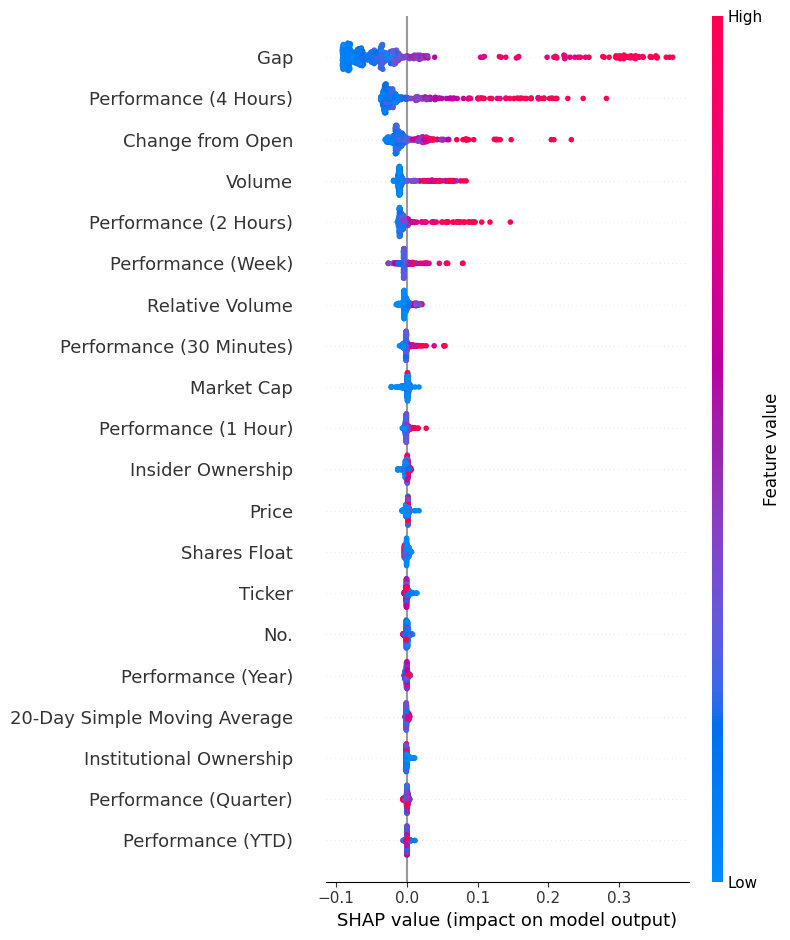

In [109]:
# SHAP

# Fit your model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Plot feature importance
shap.summary_plot(shap_values, X)

In [111]:
# Top 5 features
# Gap
# Volume
# Change from Open
# Performance (4 hours)
# Performance (2 hours)

## Feature Engineering

### Defining Technical Indicators

In [112]:
close = combined_data['Prev Close']
high = combined_data['High']
low = combined_data['Low']
volume = combined_data['Volume']
ret = close.pct_change().dropna().rename('ret')

In [113]:
def plot(series):
    plt.figure(figsize=(8,4))
    plt.plot(series)
    plt.title(series.name)
    plt.show()

def corrmat(a,b, name1,name2):
    return pd.DataFrame({name1:a,name2:b}).dropna().corr()

def sma(series, window):
    return series.rolling(window).mean()

In [114]:
# ADI

money_flow_mult = ((close - low) - (high - close)) / (high - low)
money_flow_volume = money_flow_mult * volume

adi = money_flow_volume.cumsum()
adi = adi.rename('Accumulation/Distribution Index (ADI)')

In [115]:
# cmf
cmf = money_flow_volume.rolling(1).sum() / volume.rolling(1).sum()
cmf = cmf.rename('Chaikin Money Flow')

In [116]:
# eom

eom = ta.volume.ease_of_movement(high,low,volume,1)

In [117]:
# mfi

mfi = ta.volume.money_flow_index(high,low,close,volume,5)

In [118]:
# fi

fi_1 = ta.volume.force_index(close,volume,window=1)
fi_13 = ta.volume.force_index(close,volume,window=13)

In [119]:
# nvi
nvi = ta.volume.negative_volume_index(close,volume)

In [120]:
obv = ta.volume.on_balance_volume(close,volume)


In [121]:
vpt = (volume*ret).cumsum().rename('vpt')

In [122]:
vwap = ta.volume.volume_weighted_average_price(high,low,close,volume)


In [123]:
vpr = (volume*ret).rename('volume price return')

In [124]:
adi_sig = (adi-sma(adi,10)).rename('ADI Signal')

In [125]:
cmf_sig = (cmf-sma(cmf,10)).rename('CMF Signal')

In [126]:
obv_sig = (obv-sma(obv,10)).rename('OBV Signal')

### Feature Selection on Technical Indicators

In [135]:
adi = adi.reset_index(drop=True)
cmf = cmf.reset_index(drop=True)
eom = eom.reset_index(drop=True)
fi_1 = fi_1.reset_index(drop=True)
fi_13 = fi_13.reset_index(drop=True)
mfi = mfi.reset_index(drop=True)
nvi = nvi.reset_index(drop=True)
obv = obv.reset_index(drop=True)
vpt = vpt.reset_index(drop=True)
vwap = vwap.reset_index(drop=True)
vpr = vpr.reset_index(drop=True)
adi_sig = adi_sig.reset_index(drop=True)
cmf_sig = cmf_sig.reset_index(drop=True)
obv_sig = obv_sig.reset_index(drop=True)

In [143]:
features = pd.DataFrame([adi, cmf, eom, fi_1, fi_13, mfi, nvi, obv, vpt, vwap, vpr, obv_sig]).T

In [144]:
features.rename(columns={'Unnamed 0': 'Money Flow Volume'}, inplace=True)

In [145]:
# display all NA values in features
features.isna().sum()

,0
Accumulation/Distribution Index (ADI),6
Chaikin Money Flow,20
eom_1,1
fi_1,1
fi_13,13
mfi_5,24
nvi,0
obv,0
vpt,1
vwap_14,13


In [146]:
features.fillna(0, inplace=True)

In [148]:
def minmaxscaler(x):
    scaler = MinMaxScaler()
    return pd.DataFrame(scaler.fit_transform(x),columns=x.columns,index = x.index)

In [149]:
features.replace([np.inf, -np.inf], 0, inplace=True)

In [150]:
features = minmaxscaler(features)

In [154]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, y)

# Get feature importance
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'feature': features.columns, 'importance': feature_importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

importance_df

,feature,importance
7,obv,0.271027
1,Chaikin Money Flow,0.188755
8,vpt,0.141451
11,OBV Signal,0.108536
4,fi_13,0.088766
6,nvi,0.068307
9,vwap_14,0.049250
5,mfi_5,0.032359
2,eom_1,0.014028
0,Accumulation/Distribution Index (ADI),0.013817


## Model Selection

In [198]:
# Final features and target variable
final_features = ['Ticker', 'TimeElapsed', 'Gap', 'Volume', 'Change from Open', 'Performance (2 Hours)', 'Performance (4 Hours)', 'Change']
final_features_df = combined_data[final_features]

In [199]:
# Final Indicators
final_indicators = pd.DataFrame([obv, cmf, vpt, obv_sig, fi_13]).T
final_indicators.columns = ['On Balance Volume', 'Chaikin Money Flow', 'Volume Price Trend', 'OBV Signal', 'Force Index (13 Periods)']
final_indicators.fillna(0, inplace=True)

In [200]:
# combined final feature and final indicators
final_features_df = final_features_df.reset_index(drop=True)
final_indicators = final_indicators.reset_index(drop=True)

# Concatenate the two DataFrames horizontally
final_df = pd.concat([final_features_df, final_indicators], axis=1)


In [201]:
final_df[final_df['Ticker'] == 0]

,Ticker,TimeElapsed,Gap,Volume,Change from Open,Performance (2 Hours),Performance (4 Hours),Change,On Balance Volume,Chaikin Money Flow,Volume Price Trend,OBV Signal,Force Index (13 Periods)
298,0,0.0,0.1045,558610,0.0000,0.0137,0.0137,0.1045,1.969803e+09,-4.666667,1.884033e+09,10529551.8,-282846.040207
299,0,15.0,0.1045,932674,-0.0199,-0.0065,-0.0065,0.0825,1.970736e+09,-2.800000,1.884033e+09,1481485.6,-242439.463034
300,0,30.0,0.1045,971489,-0.0270,-0.0137,-0.0137,0.0746,1.971708e+09,-2.800000,1.884033e+09,2091292.0,-207805.254029
301,0,45.0,0.1045,1002289,-0.0203,-0.0068,-0.0068,0.0821,1.972710e+09,-2.800000,1.884033e+09,2651387.5,-178118.789168
302,0,60.0,0.1045,1027757,-0.0203,-0.0068,-0.0068,0.0821,1.973738e+09,-2.800000,1.884033e+09,3156110.3,-152673.247858
303,0,75.0,0.1045,1070091,-0.0267,-0.0201,-0.0134,0.0750,1.974808e+09,-2.800000,1.884033e+09,3620073.0,-130862.783879
304,0,90.0,0.0672,1170945,-0.0140,-0.0342,-0.0342,0.0522,1.975979e+09,-8.000000,1.884033e+09,4092713.1,-112168.100467
305,0,105.0,0.0672,1612843,-0.0213,-0.0480,-0.0414,0.0444,1.977591e+09,-1.571429,1.884033e+09,4872612.4,-96144.086115
306,0,120.0,0.0672,1853539,-0.0346,-0.0548,-0.0545,0.0302,1.979445e+09,-1.571429,1.884033e+09,5757090.2,-82409.216670


### Basic Models

In [202]:
X = final_df.drop(columns=['Change', 'Ticker'])
y = final_df['Change']

In [203]:
# Prepare Data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally standardize features (important for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [204]:
# Linear Regression

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr:.4f}, R2: {r2_lr:.4f}')


Linear Regression - MSE: 0.0015, R2: 0.9684


In [205]:
# Random Forest Regressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf:.4f}, R2: {r2_rf:.4f}')

Random Forest - MSE: 0.0064, R2: 0.8637


In [206]:
# XGBoost Regressor

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost - MSE: {mse_xgb:.4f}, R2: {r2_xgb:.4f}')

XGBoost - MSE: 0.0068, R2: 0.8556


### LSTM Time Series Model

In [209]:
final_df = final_df.sort_values(by=['Ticker', 'TimeElapsed'])

In [210]:
# Define the proportion for each split
train_size = 0.7  # 70% for training
test_size = 0.2   # 20% for testing
unseen_size = 0.1 # 10% for unseen data

# Get the index for splitting
train_end = int(len(final_df) * train_size)
test_end = int(len(final_df) * (train_size + test_size))

# Split the data
train_df = final_df[:train_end]
test_df = final_df[train_end:test_end]
unseen_df = final_df[test_end:]

print(f"Training set: {len(train_df)} rows")
print(f"Testing set: {len(test_df)} rows")
print(f"Unseen set: {len(unseen_df)} rows")

Training set: 324 rows
Testing set: 93 rows
Unseen set: 47 rows


In [212]:
# Splitting as before (using TimeElapsed as a feature)
X = final_df.drop(columns=['Change']).values
y = final_df['Change'].values

# Define the number of time steps
time_steps = 10  # Adjust as needed

# Create the 3D input for LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_dataset(X[:train_end], y[:train_end], time_steps)
X_test, y_test = create_dataset(X[train_end:test_end], y[train_end:test_end], time_steps)
X_unseen, y_unseen = create_dataset(X[test_end:], y[test_end:], time_steps)

In [213]:
# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate on unseen data
loss = model.evaluate(X_unseen, y_unseen)
print(f"Unseen Data Loss: {loss}")

# Predictions
predictions = model.predict(X_unseen)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0696 - val_loss: 0.0342
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0576 - val_loss: 0.0331
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0437 - val_loss: 0.0237
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0336 - val_loss: 0.0255
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0304 - val_loss: 0.0254
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0324 - val_loss: 0.0218
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0375 - val_loss: 0.0263
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0345 - val_loss: 0.0210
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0321 - val_loss: 0.0254
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0271 - val_loss: 0.0236
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0335 
Unseen Data Loss: 0.033861249685287476
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step


In [215]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_unseen, predictions)
mse = mean_squared_error(y_unseen, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_unseen, predictions)

# Print out the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.13144567829257736
Mean Squared Error (MSE): 0.03386124980671852
Root Mean Squared Error (RMSE): 0.1840142652261463
R-squared (R²): -0.13924849250115767


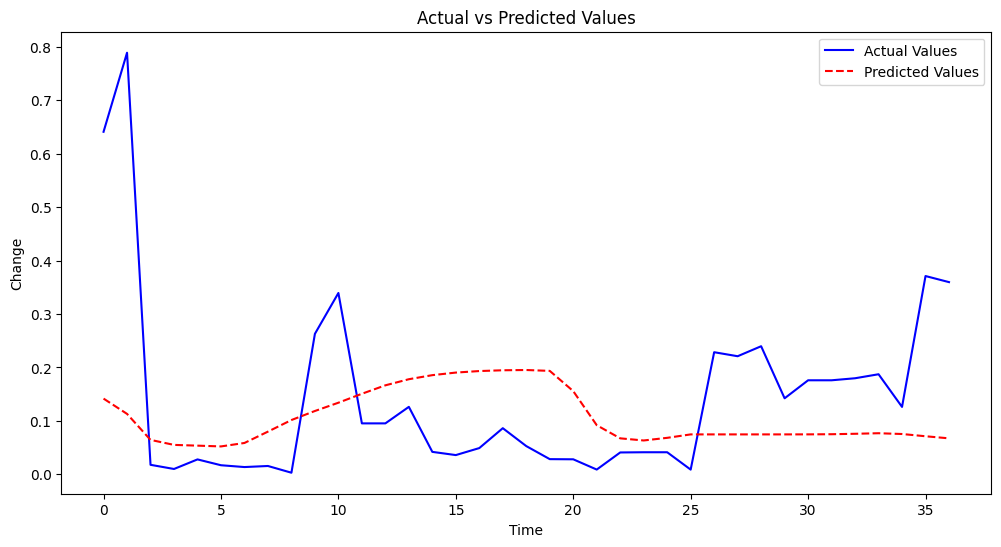

In [216]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_unseen, label='Actual Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Change')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

### Basic Nueral Network

In [85]:
# Neural Network

# Define the model
model = Sequential()

# Input layer
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Summary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           5,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,257 (63.50 KB)

 Trainable params: 16,257 (63.50 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.4064 - val_loss: 0.1471
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0907 - val_loss: 0.0378
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0437 - val_loss: 0.0346
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0338 - val_loss: 0.0240
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0249 - val_loss: 0.0165
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0301 - val_loss: 0.0146
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0203 - val_loss: 0.0132
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 - val_loss: 0.0124
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135 - val_loss: 0.0119
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0184 - val_loss: 0.0125
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0107 - val_loss: 0.0104
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 - val_

In [87]:
# Make predictions
y_pred_nn = model.predict(X_test)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Neural Network - MSE: {mse_nn:.4f}, R2: {r2_nn:.4f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Neural Network - MSE: 0.0059, R2: 0.8553


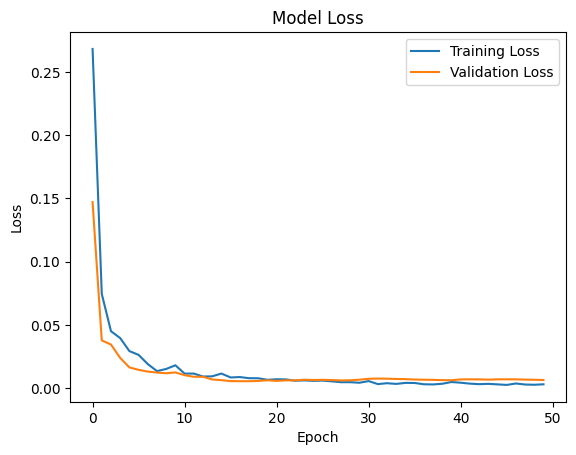

In [88]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()